In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/fraud-detection/synth_composite.csv


## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_theme()
sns.set_style("darkgrid")

## Load dataset

In [3]:
df = pd.read_csv('../input/fraud-detection/synth_composite.csv')

### Show some stats

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0
5,493,CASH_OUT,281403.795998,160_6037426_0,42235.923347,0.000000,160_2092767_0,5.880235e+05,8.693219e+05,0,0
6,18,PAYMENT,4355.986182,160_400626_0,56160.034248,51804.048066,160_175474_0,8.496485e+00,1.078249e+01,0,0
7,550,CASH_IN,102079.164541,160_6146482_0,15781.717821,0.000000,160_354507_0,4.064748e+06,3.962757e+06,0,0
8,284,CASH_OUT,144074.648278,160_3889478_0,197270.864524,53196.216246,160_1089660_0,1.097389e+06,1.241346e+06,0,0
9,132,CASH_OUT,142367.900524,160_1163767_0,0.185064,0.000000,160_29365_0,2.424877e+06,2.567106e+06,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
df['isFlaggedFraud'].value_counts()

0    6362606
1         14
Name: isFlaggedFraud, dtype: int64

In [8]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6354407,741,CASH_OUT,2.00,161_8178_0,-71.00,-73.0,161_8134_0,2.700696e+05,2.702828e+05,1,0
6354408,212,CASH_OUT,362998.52,161_2386_0,363050.52,52.0,161_2374_0,2.159733e+06,2.523959e+06,1,0
6354409,568,CASH_OUT,66187.66,161_6282_0,66125.66,-62.0,161_6251_0,7.177089e+05,7.832872e+05,1,0
6354410,15,CASH_OUT,696771.08,161_168_0,696771.08,0.0,161_167_0,3.688858e+05,1.351356e+06,1,0
6354411,501,CASH_OUT,73332.47,161_5584_0,73285.47,-47.0,161_5556_0,1.253682e+05,1.923281e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,483,CASH_OUT,22982.73,161_5384_0,22981.73,-1.0,161_5356_0,3.279893e+06,3.304007e+06,1,0
6362616,214,CASH_OUT,1368390.50,161_2420_0,1368453.50,63.0,161_2408_0,2.589394e+05,1.624944e+06,1,0
6362617,679,CASH_OUT,3150440.28,161_7476_0,3150454.28,14.0,161_7437_0,6.372507e+03,3.157667e+06,1,0
6362618,482,CASH_OUT,75655.33,161_5366_0,75647.33,-8.0,161_5338_0,8.529471e+05,9.285452e+05,1,0


In [9]:
df[df['isFraud']==1].index[-1] - df[df['isFraud']==1].index[0]

8212

--> The last rows in the df are labeled as fraud

In [10]:
df_10 = df.sample(frac=0.1)

In [11]:
df_10['isFraud'].value_counts()

0    635434
1       828
Name: isFraud, dtype: int64

In [12]:
df_10.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6159247,163,CASH_IN,3.355402e+05,160_1823699_0,2.555720e+06,2.220180e+06,160_293632_0,3.455275e+05,1.004733e+04,0,0
2499263,34,PAYMENT,1.548856e+04,160_620612_0,3.298798e+05,3.143913e+05,160_269426_0,5.908356e+00,5.252362e+00,0,0
5113248,34,PAYMENT,2.997790e+04,160_601783_0,2.547459e+02,0.000000e+00,160_261438_0,8.058128e+00,8.023804e+00,0,0
1215315,190,TRANSFER,1.550380e+06,160_2353736_0,5.505986e-01,0.000000e+00,160_113037_0,1.565588e+06,3.115953e+06,0,0
5515319,182,PAYMENT,2.584224e+04,160_5249758_0,1.470384e+00,0.000000e+00,160_2244475_0,7.548028e+00,5.383987e+00,0,0


In [13]:
df_10['type'].value_counts()

CASH_OUT    223712
PAYMENT     215144
CASH_IN     139804
TRANSFER     53453
DEBIT         4149
Name: type, dtype: int64

In [14]:
df_10['type'].value_counts().index

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

Text(0.5, 1.0, 'Type of transaction')

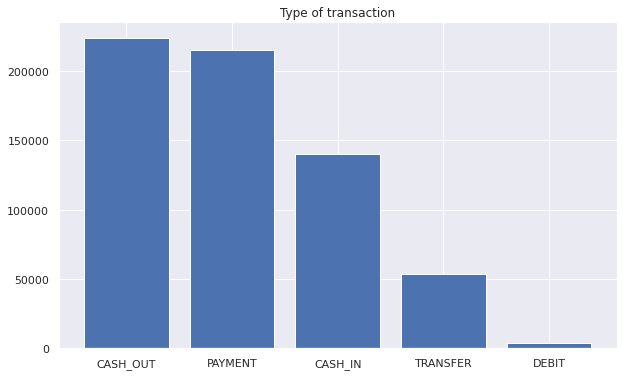

In [15]:
fig = plt.figure(figsize=(10,6))
x = df_10['type'].value_counts().index
y = df_10['type'].value_counts()
plt.bar(x,y)
plt.title('Type of transaction')

In [16]:
df_10.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
df_10.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
df_10['nameOrig'].value_counts()

160_37718_0      2
160_1499490_0    2
160_3581025_0    2
160_2099735_0    2
160_1525874_0    2
                ..
160_1039084_0    1
160_3339036_0    1
160_6079297_0    1
160_105264_0     1
160_1485645_0    1
Name: nameOrig, Length: 636152, dtype: int64

### LabelEncode object typed columns to get numeric data for them

In [19]:
le = LabelEncoder()
df_10_le = df_10.copy()

for i_col in df_10_le.columns:
    if df_10_le[i_col].dtype == "object":
        labels = df_10_le[i_col].astype(str).values
        le.fit(labels)
        df_10_le[i_col] = le.transform(df_10_le[i_col])

In [20]:
df_10_le.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6159247,163,0,3.355402e+05,91633,2.555720e+06,2.220180e+06,288116,3.455275e+05,1.004733e+04,0,0
2499263,34,3,1.548856e+04,579328,3.298798e+05,3.143913e+05,278312,5.908356e+00,5.252362e+00,0,0
5113248,34,3,2.997790e+04,558789,2.547459e+02,0.000000e+00,267975,8.058128e+00,8.023804e+00,0,0
1215315,190,4,1.550380e+06,150949,5.505986e-01,0.000000e+00,26911,1.565588e+06,3.115953e+06,0,0
5515319,182,3,2.584224e+04,473369,1.470384e+00,0.000000e+00,218960,7.548028e+00,5.383987e+00,0,0


## Import isolation forest

In [21]:
from sklearn.ensemble import IsolationForest
contamination = 0.01

